# <div style="text-align: center"> Dummy Variables & One Hot Encoding </div>

# Outlines
* Using pandas get_dummies
* Using sklearn OneHotEncod
* Excercise

# Problem
<div style="text-align: justify">
    Bhild a predictor function to predict price of a home,<br>
    1. With 3400 sqr ft area in west windsor<br>
    2. 2800 sqr ft home in robbinsville 
    </div>

# How to handle text data?
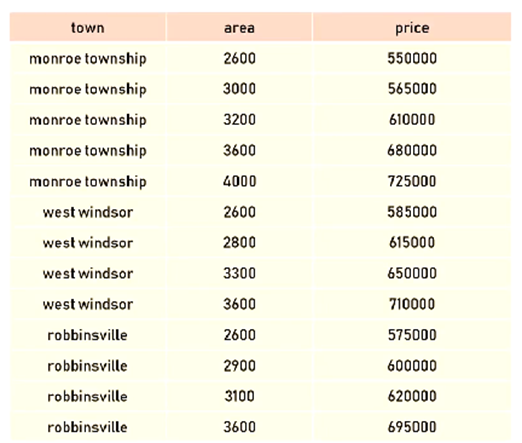

<div style="text-align: justify">
    One way to handle text data is labal encoding. In other words assign integets to text like this:<br>
    Monroe township = 1, West Windsor =2, Robbinsville =3<br>
    The problem with this approach is that it will assume<br>
        Monroe township < West Windsor < Robbinsville =3?? <br>
    This isn't make sense.
    </div>

# Categorical Variables:
<div style="text-align: justify">
    There are 2 types of categorical variables: <br>
    1. Nominal: The categories don't have any numeric order. such as male & female, colors, name of towns.<br>
    2. Ordinal: The categories have some numeric order. Such as degree, ... 
    </div>

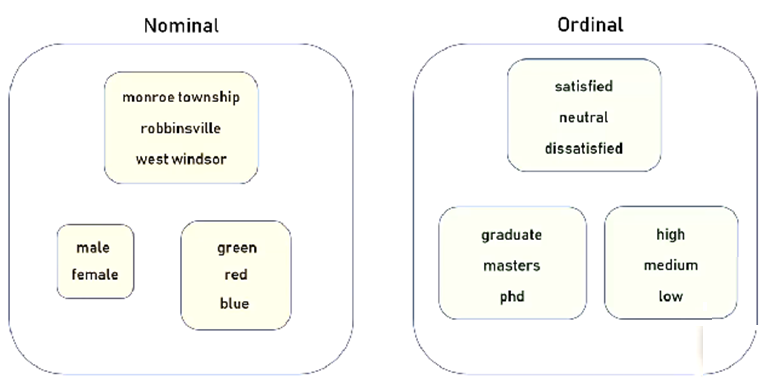

# One Hot Encoding
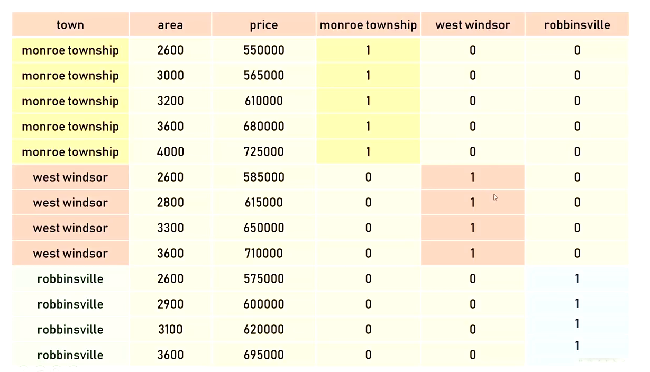

**The way One hot encoding works is you create a new column for each of your categories and assign binary value of 1 and 0.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D:/Data_Science/My Github/Machine-Learning-with-Python/5. One Hot Encoding/Example/homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
# Create dummy variable columns
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
# concatenate dummy variables with my original dataframes
merged = pd.concat([df,dummies],axis = 'columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
# drop town column because you already have this information and it is not work on linear regression model
final = merged.drop('town',axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# x variable is all of columns except price
x = final.drop('price',axis='columns')
x

,area,monroe township,robinsville,west windsor
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0
5,2600,0,0,1
6,2800,0,0,1
7,3300,0,0,1
8,3600,0,0,1
9,2600,0,1,0


In [8]:
# y is price
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [9]:
# fitting x & y to Linear Regression Model
model.fit(x,y)

LinearRegression()

# Problem
<div style="text-align: justify">
    Bhild a predictor function to predict price of a home,<br>
    1. With 3400 sqr ft area in west windsor<br>
    2. 2800 sqr ft home in robbinsville 
    </div>

# Prediction
1. With 3400 sqr ft area in west windsor

In [10]:
model.predict([[3400,0,0,1]])

array([681241.66845839])

2. 2800 sqr ft area home in robbinsville

In [11]:
model.predict([[2800,0,1,0]])

array([590775.6396474])

## Measure the accuracy of your model

In [12]:
model.score(x,y)

0.9573929037221875

# Use sklearn OneHotEncoder

In [13]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


**In order to use OneHotEncoder first you need to label encoding into town column**

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
dfle=df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int64)

fit_transform takes the town column and it will return the labels. 

In [34]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [35]:
x = dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [36]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

## Now we need to create dummy variable encoder

In [37]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town',OneHotEncoder(),[0])],remainder='passthrough')
# you need to specify the column you want to convert to OneHotEncoder

In [41]:
X = ct.fit_transform(x)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [43]:
# drop the first column
# take all the rows but for colums start from 1 not 0
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [44]:
model.fit(X,y)

LinearRegression()

## Prediction

**With 3400 sqr ft area in west windsor**

In [47]:
model.predict([[0,1,3400]])

array([681241.6684584])

**2800 sqr ft area home in robbinsville**

In [46]:
model.predict([[1,0,2800]])

array([590775.63964739])

# Excercise
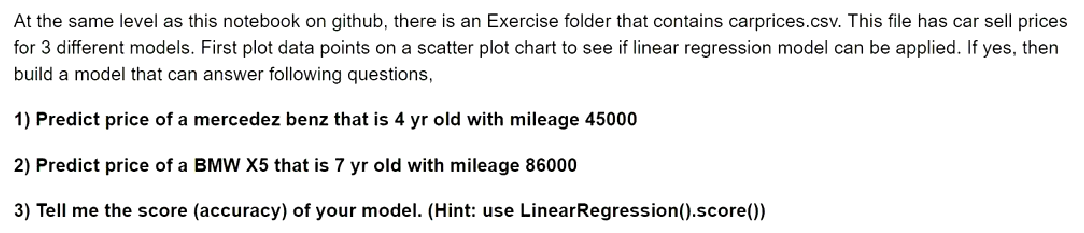

# Solution

In [48]:
import pandas as pd
df = pd.read_csv("D:/Data_Science/My Github/Machine-Learning-with-Python/5. One Hot Encoding/Exercise/carprices.csv")
df

,car,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()

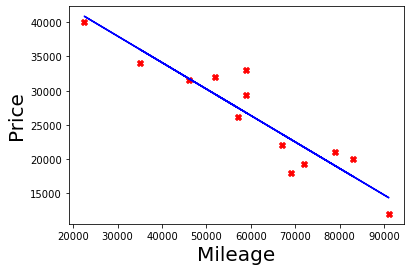

In [53]:
%matplotlib inline
model = model.fit(df[['mileage']],df.price)
fig1 = plt.figure()
plt.xlabel('Mileage',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(df.mileage,df.price,color='red',marker='X')
plt.plot(df.mileage,model.predict(df[['mileage']]),color='blue')
plt.show()

## OneHotEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.car = le.fit_transform(df.car)
df

,car,mileage,price,age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [55]:
X = df[['car','mileage','age']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [56]:
Y = df.price
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: price, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('car',OneHotEncoder(),[0])],remainder='passthrough')

In [58]:
ct = ct.fit_transform(X)
ct

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [59]:
ct = ct[:,1:]
ct

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [60]:
model.fit(ct,Y)

LinearRegression()

**Price of mercedez benz that is 4 yr old with mileage 45000**

In [61]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

**Price of BMW X5 that is 7 yr old with mileage 86000**

In [62]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

**model accuracy**

In [63]:
model.score(ct,Y)

0.9417050937281083

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-08-25    |   <font color=blue>**Ehsan Zia**</font>  |  |  |

